<font color="violet" size="6"><b>ch10 Pandas(데이터프레임,시리즈)<b/></font>
- pip install pandas (cmd창에서 실행)

# 1절 판다스 패키지
- 데이터 분석을 위한 반드시 알아야 할 패키지
- numpy를 기반으로 하며, 다른 라이브러리와 잘 통합되어 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터 프레임을 제공
- 결측치처리, 크기변경(열삭제/추가, 행삭제/추가), 데이터정렬, 데이터분할/병합, 통계처리, 부분데이터 추출, 파일입출력, 레이블링, 시각화용이, ...)

In [3]:
import numpy as np
np.pi

3.141592653589793

In [4]:
import pandas as pd
pd.__version__

'2.1.4'

In [5]:
data=pd.read_json('data/ch10_member1.json',encoding="cp949")#디폴트가 UTF-8
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [6]:
data=pd.read_json('data/ch10_member2.json')#UTF-8로 read, encoding 다르면 에러
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [7]:
member1=pd.read_csv('data/ch09_member1.csv',header=None, names=['name','age','email','address'],encoding='utf-8')
member1

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


# 2절 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해 데이터프레임 만들기

In [8]:
d={'name':['홍길동','신길동'],'age':[20,30]}
df=pd.DataFrame(data=d)
df

,name,age
0,홍길동,20
1,신길동,30


## 2.2 리스트를 이용해 데이터프레임 만들기

In [9]:
d=[{'name':'홍길동','age':20},{'name':'신길동','age':30}]

In [10]:
df=pd.DataFrame(data=d)


## 2.3 read_csv()

In [11]:
df= pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df.shape #행, 열
df

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [12]:
df.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [13]:
pd.options.display.max_columns # 최대 데이터 프레임의 표현될 수 있는 열 수

20

## 2.4 sklearn, statsmodels, seaborn 등의 라이브러리에서 데이터프레임 불러오기

In [14]:
import statsmodels.api as sm
iris=sm.datasets.get_rdataset("iris",package="datasets").data
iris.tail() #끝 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절 이름(열,행) 지정하기

In [15]:
member_df=pd.read_csv('data/ch09_member1.csv',header=None)
member_df

,0,1,2,3
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [16]:
#열이름 지정하기
member_df.columns=['name','age','email','address']
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [17]:
member_df=pd.concat([member_df,member_df]) # 행 이름이 연속되지 않음
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구


In [18]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [19]:
member_df.index=range(len(member_df))
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,park@hong.com,서울시 강남구
9,김길북,20,park@hong.com,서울시 강북구


In [20]:
# name열을 행(index)이름으로
#member_df=member_df.set_index("name")#inplace=false적용된 내용 return
member_df.set_index("name",inplace=True)#inplace=true 데이터프레임에 적용
member_df

,age,email,address
name,,,
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,park@hong.com,서울시 강남구
김길북,20,park@hong.com,서울시 강북구
신길서,40,park@hong.com,서울시 강서구
신길동,28,park@hong.com,서울시 강서동
홍길동,20,hong@hong.com,서울시 강동구
박길서,33,park@hong.com,서울시 강서구
박길남,23,park@hong.com,서울시 강남구


In [21]:
#행 이름을 컬럼에 편입시키기
#member_df=member_df.reset_index()#reset 적용한 것을 return
member_df.reset_index(inplace=True) #reset을 member_df에 적용
member_df

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
6,홍길동,20,hong@hong.com,서울시 강동구
7,박길서,33,park@hong.com,서울시 강서구
8,박길남,23,park@hong.com,서울시 강남구
9,김길북,20,park@hong.com,서울시 강북구


In [22]:
name=member_df['name'] #1차원 데이터 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     홍길동
1     박길서
2     박길남
3     김길북
4     신길서
5     신길동
6     홍길동
7     박길서
8     박길남
9     김길북
10    신길서
11    신길동
Name: name, dtype: object

member=member_df.loc[0] # 0번 인덱스 행 =>시리즈(1차원)
print(type(member))
member

In [23]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   age      12 non-null     int64 
 2   email    12 non-null     object
 3   address  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [24]:
#타입 바꾸기
member_df['age']=member_df['age'].astype('float64')#데이터 프레임의 열의 타입을 변경
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     12 non-null     object 
 1   age      12 non-null     float64
 2   email    12 non-null     object 
 3   address  12 non-null     object 
dtypes: float64(1), object(3)
memory usage: 516.0+ bytes


# 4절 부분 데이터 조회
- 특정열, 특정행, 특정행의 특정열, 특정조건의 행 모든열, 특정조건의 행의 특정열

In [25]:
member=pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


## 4.1 단일열 조회

In [26]:
member['name'] # 시리즈
member['name'].to_frame() #시리즈를 데이터프레임으로

,name
0,홍길동
1,박길서
2,박길남
3,김길북
4,신길서
5,신길동


## 4.2 loc[]을 이용한 이름(열,행)으로 조회
- 단일행, 여러열, 행과 열 동시에 접근
- member.loc[행,열] #행/열 슬라이싱 가능(0~4행:loc[[0:5],열])
- 

In [27]:
# 단일행
member.loc[0] #시리즈

name                 홍길동
age                   20
email      hong@hong.com
address          서울시 강동구
Name: 0, dtype: object

In [28]:
# 여러행
member.loc[0:5] #0~4행

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [29]:
# 여러열
member.loc[:,'name']
#name열부터 email열까지 ==age열포함
member.loc[:,'name':'email']#from:to:step

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,park@hong.com
3,김길북,20,park@hong.com
4,신길서,40,park@hong.com
5,신길동,28,park@hong.com


In [30]:
#여러열(name열과 email 열)
member.loc[:,['name','email']]

,name,email
0,홍길동,hong@hong.com
1,박길서,park@hong.com
2,박길남,park@hong.com
3,김길북,park@hong.com
4,신길서,park@hong.com
5,신길동,park@hong.com


In [31]:
#1행부터 4행까지 name과 email
member.loc[1:4,['name','email']]

,name,email
1,박길서,park@hong.com
2,박길남,park@hong.com
3,김길북,park@hong.com
4,신길서,park@hong.com


In [32]:
#1행과 4행, name,email,address
member.loc[[1,4],['name','email','address']]

,name,email,address
1,박길서,park@hong.com,서울시 강서구
4,신길서,park@hong.com,서울시 강서구


In [33]:
#1행~4행까지 name~email열 출력
member.loc[1:4,'name':'address']

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구


## 4.3 iloc[]을 이용한 숫자(index)로 조회
- 몇번째 행부터 몇번째 행 앞까지, 몇번째 열부터 몇번째 열 앞까지;
- 음수가능

In [34]:
member.iloc[0:4] #slicing from:to:step

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구


In [35]:
member.iloc[0,0:3] #0열부터 3열 앞까지

name               홍길동
age                 20
email    hong@hong.com
Name: 0, dtype: object

In [36]:
#맨 오른쪽 열을 제외하고 입력
member.iloc[:,:-1]

,name,age,email
0,홍길동,20,hong@hong.com
1,박길서,33,park@hong.com
2,박길남,23,park@hong.com
3,김길북,20,park@hong.com
4,신길서,40,park@hong.com
5,신길동,28,park@hong.com


In [37]:
#짝수번째 행의 모든 열 출력
member.iloc[::2,0:2]

,name,age
0,홍길동,20
2,박길남,23
4,신길서,40


In [38]:
#member의 행순서를 역순 출력(맨 마지막 열을 제외하고)
member.iloc[::-1,:-1]

,name,age,email
5,신길동,28,park@hong.com
4,신길서,40,park@hong.com
3,김길북,20,park@hong.com
2,박길남,23,park@hong.com
1,박길서,33,park@hong.com
0,홍길동,20,hong@hong.com


## 4.4 조건으로 조회하기

In [39]:
member.loc[member['age']>30] #인덱스 대신 조건

,name,age,email,address
1,박길서,33,park@hong.com,서울시 강서구
4,신길서,40,park@hong.com,서울시 강서구


In [40]:
address='서울시 강동구'
address.find('강동구')

4

#시리즈에 문자함수
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [41]:
member['address'].str.find('강서구')!=-1

0    False
1     True
2    False
3    False
4     True
5    False
Name: address, dtype: bool

In [42]:
#address가 강서구인 데이터의 name,age, address를 출력
member.loc[member['address'].str.find('강서구')!=-1,['name','age','address']]

,name,age,address
1,박길서,33,서울시 강서구
4,신길서,40,서울시 강서구


In [43]:
member.isna().sum()#결측치여부

name       0
age        0
email      0
address    0
dtype: int64

In [44]:
# iris
import seaborn as sns
iris_df=sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
# 0~49 setosa/ 50~99: sesicolor/ 100~149: virginica
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [46]:
#species가 versicolor인 데이터의 상위 3개의 모든열
iris_df[iris_df['species']=='versicolor'].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [47]:
#species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.loc[iris_df['species']=='versicolor',"sepal_length":"petal_width"].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


In [48]:
#species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
#iloc을 사용할때는 index만 사용 가능하므로 조건 뒤에 []로 뺌
iris_df.iloc[:,:-1][iris_df['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3
59,5.2,2.7,3.9,1.4


In [49]:
#조건이 2개인 경우
#sepal_length>6.2 & species==versicolor
#iris_df['species'] == iris_df.species
iris_df[(iris_df.species=='versicolor') & (iris_df.sepal_length>6.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [50]:
#sepal_length>6.2 & species==versicolor인 데이터의 sepal_length와 species, sepal_width를 출력
iris_df.loc[(iris_df.species=='versicolor') & (iris_df.sepal_length>6.2),['sepal_length','sepal_width','species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# 5절 데이터 추가 및 삭제

In [51]:
member=pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [52]:
import numpy as np
member['major']=['컴공','전기','전자','기계','AI',np.nan]
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,서울시 강서구,전기
2,박길남,23,park@hong.com,서울시 강남구,전자
3,김길북,20,park@hong.com,서울시 강북구,기계
4,신길서,40,park@hong.com,서울시 강서구,AI
5,신길동,28,park@hong.com,서울시 강서동,NaN


In [53]:
hobby=pd.DataFrame({'hobby':['놀기','자기','읽기','먹기','공부','명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [54]:
#데이터 추가
pd.concat([member,hobby],axis=1) #axis=0: 행병합, axis=1: 열병합
member

,name,age,email,address,major
0,홍길동,20,hong@hong.com,서울시 강동구,컴공
1,박길서,33,park@hong.com,서울시 강서구,전기
2,박길남,23,park@hong.com,서울시 강남구,전자
3,김길북,20,park@hong.com,서울시 강북구,기계
4,신길서,40,park@hong.com,서울시 강서구,AI
5,신길동,28,park@hong.com,서울시 강서동,NaN


In [55]:
#열삭제: axis=1
member.drop(['major'],axis=1,inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [56]:
member.index=range(len(member)) #index정리
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


# 6절 정렬

In [57]:
#index기준 내림차순/오름차순
member=member.sort_index(axis=0,ascending=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동


In [58]:
#특정열의 값 기준 정렬
#inplace=True하거나 member=member.sort~에 다시 할당
member.sort_values(by=['name','age'],ascending=False,inplace=True)
member

,name,age,email,address
0,홍길동,20,hong@hong.com,서울시 강동구
4,신길서,40,park@hong.com,서울시 강서구
5,신길동,28,park@hong.com,서울시 강서동
1,박길서,33,park@hong.com,서울시 강서구
2,박길남,23,park@hong.com,서울시 강남구
3,김길북,20,park@hong.com,서울시 강북구


# 7절 기초통계 분석
- count: NA(결측치)를 제외한 갯수
- min
- max
- sum
- mean
- std:표준편차
- var:분산
- quantile: 분위수(1사분위수,2사분위수,3사분위수)
- median:중간값
- corr:상관관계

In [59]:
iris_df.min(axis=0)#모든 열의  최소값
iris_df.iloc[:,:-1].min(axis=1)#행마다 모든 열의 최솟값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [60]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [61]:
iris_df.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [62]:
iris_df.iloc[:,:-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [63]:
iris_df.describe() #수치형 데이터의 갯수, 평균, 표준편차, 최소, 사분위수, 최대

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
iris_df.species.describe() #범주형데이터: 전체갯수, 가장 많은것, 가장 많은것의 갯수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [65]:
iris_df.describe(include='all') # 수치형, 범주형 모두 분석

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [66]:
iris_df[iris_df['species'].isna()] # species가 결측치인 행을 출력

,sepal_length,sepal_width,petal_length,petal_width,species


# 8절 그룹화

In [67]:
iris_df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [68]:
iris_group=iris_df.groupby('species')
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# 9절 연습문제

In [69]:
iris=sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
120,6.9,3.2,5.7,2.3,virginica


In [70]:
#1 처음 다섯개의 행
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
#2 독립변수 x, 종속변수 y
y=iris.loc[:,'species'].to_frame() #한열밖에 없어서 series로 나오므로 프레임으로 변형
x=iris.iloc[:,:-1]
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
        species
 0       setosa
 1       setosa
 2       setosa
 3       setosa
 4       setosa
 ..         ...
 145  virginica
 146  virginica
 147  virginica
 148  virginica
 149  virginica
 
 [150 rows x 1 columns])

In [72]:
#3 처음 50개의 행
temp=iris.head(50)
temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [73]:
#4 모든 열의 요약정보
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [74]:
#5 versicolor종의 데이터만 iris_versicolor에 저장
iris_versicolor=iris[iris.species=='versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [75]:
#6 x,y합해서 iris_df만들기
iris_df=pd.concat([x,y],axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [76]:
#7 열 평균값
iris.describe().mean()

sepal_length    23.271425
sepal_width     21.124150
petal_length    21.809162
petal_width     19.745196
dtype: float64

In [77]:
#8 열들 사이의 상관계수
r=iris.iloc[:,:-1].corr()

<Axes: >

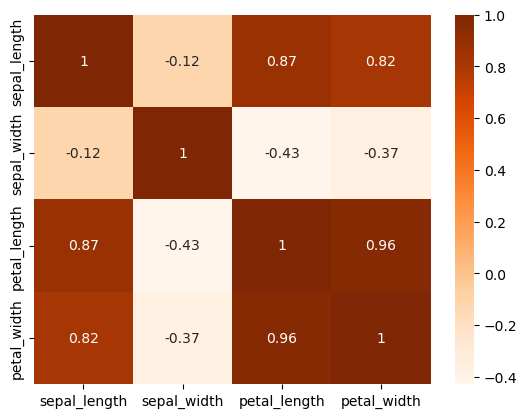

In [82]:
#import seaborn as sns
#import matplolib.pylot as plt
#plt.figure(figuresize=(12,6))#그래프 크기
sns.heatmap(r,annot=True,cmap="Oranges")
#plt.show()
#seaborn 라이브러리 업그레이드: 아나콘다 프롬프트 pip install seaborn --upgrade
#업그레이드 확인: pip show seaborn

In [83]:
#9 종별 평균
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
